In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("customer_churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.describe(include = "all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Data Cleaning

In [6]:
data.drop(data.loc[data["TotalCharges"] == " "].index, inplace = True)

In [7]:
data.TotalCharges = data.TotalCharges.astype("float64")

In [8]:
data.SeniorCitizen = data.SeniorCitizen.astype("object")

In [9]:
data = data.drop("customerID", axis=1)

In [10]:
data.Churn = data.Churn.replace({"Yes": 1, "No": 0}).astype("object")

In [11]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [12]:
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Data Visualization

#### K Means

In [13]:
from sklearn.preprocessing import StandardScaler

# Creating design matrix and excluding the first column
xdata = pd.get_dummies(data.drop('Churn', axis=1))
x_label = xdata.columns

# Scaling the features
scaler = StandardScaler()
xdata_scaled = scaler.fit_transform(xdata)

<ipython-input-13-6bcbd8afb657>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  xdata = pd.get_dummies(data.drop('Churn', axis=1))


In [14]:
xdata

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,0,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [15]:
x_label

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       '

In [16]:
kmeans = KMeans(n_clusters=4, n_init=30)
clusters = kmeans.fit_predict(xdata_scaled)

# Get cluster centers
centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(centers, columns = x_label)

In [17]:
centers_df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.651804,0.314357,-0.453802,0.000601,-0.000601,-0.165066,0.165066,0.356157,-0.356157,0.299548,...,-0.128440,0.755431,-0.352587,-0.544214,-0.224756,0.224756,-0.184964,-0.196408,0.416178,-0.093486
1,-0.071466,-1.453336,-0.713877,-0.009036,0.009036,0.347570,-0.347570,0.000544,-0.000544,-0.263521,...,-0.796849,-0.414799,0.072480,0.414263,0.610500,-0.610500,-0.002084,0.003561,-0.541976,0.608789
2,0.907489,0.888446,1.218926,0.013196,-0.013196,-0.045137,0.045137,-0.481945,0.481945,-0.197893,...,0.710729,-0.683774,0.403128,0.412545,-0.166013,0.166013,0.250323,0.246095,-0.146422,-0.323443
3,-0.024076,-0.758072,-0.345391,-0.022968,0.022968,0.025648,-0.025648,0.056228,-0.056228,-0.003294,...,0.102318,0.003798,0.009602,-0.013577,0.051029,-0.051029,-0.025280,0.021138,-0.008396,0.013640


In [18]:
pd.Series(clusters).value_counts()

0    2732
2    2100
1    1520
3     680
dtype: int64

In [19]:
xdata["clusters"] = clusters

In [20]:
features = ["InternetService_No", "tenure", "MonthlyCharges"]

In [21]:
xdata.groupby("clusters")[features].mean()

,InternetService_No,tenure,MonthlyCharges
clusters,,,
0,0.0,16.424231,74.255271
1,1.0,30.667763,21.076283
2,0.0,54.694762,91.526071
3,0.0,31.830882,41.992500


#### PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(xdata_scaled)
pca_data = pca.transform(xdata_scaled)

In [23]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

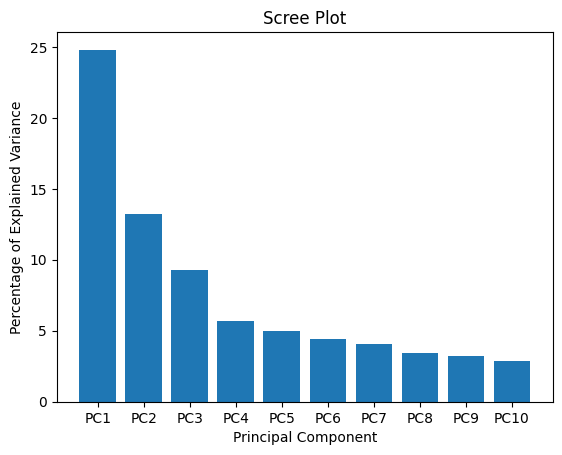

In [24]:
plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

In [25]:
df_components = pd.DataFrame(pca.components_, columns=x_label, index=labels)

# Extracting the ten biggest values for PC1
top_10_values_pc1 = df_components.loc["PC1"].nlargest(10)
print(top_10_values_pc1)

InternetService_No                      0.290471
OnlineSecurity_No internet service      0.290471
OnlineBackup_No internet service        0.290471
DeviceProtection_No internet service    0.290471
TechSupport_No internet service         0.290471
StreamingTV_No internet service         0.290471
StreamingMovies_No internet service     0.290471
PaperlessBilling_No                     0.123803
PaymentMethod_Mailed check              0.116226
MultipleLines_No                        0.115541
Name: PC1, dtype: float64


In [26]:
# Extracting the ten biggest values for PC2
top_10_values_pc2 = df_components.loc["PC2"].nlargest(10)
print(top_10_values_pc2)

tenure                  0.332016
TotalCharges            0.320498
Contract_Two year       0.239734
Partner_Yes             0.215425
DeviceProtection_Yes    0.205186
TechSupport_Yes         0.188910
StreamingMovies_Yes     0.178788
StreamingTV_Yes         0.178376
OnlineBackup_Yes        0.174636
OnlineSecurity_Yes      0.165281
Name: PC2, dtype: float64


### Machine Learning Methods


#### Training & Cross Validation

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [28]:
data_input = xdata_scaled
data_output = data["Churn"].astype("int")

In [51]:
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2, random_state=1)

#### Random Forest

In [66]:
#%% Random Forest

def random_forest(x_train, x_test, y_train, y_test):

    # defining parameters we would like to consider while hypertuning the random forest
    # in this case, we are concerned with how many trees are in the forest
    # if there are too many trees, there may be over-fitting in the model
    forest_parameters = {'n_estimators' : [10, 15, 20, 30, 100, 150, 200, 500]}
    # defining a cross validation method to find the best parameter
    model = GridSearchCV(RandomForestClassifier(), forest_parameters)
    model.fit(x_train, y_train)  # fitting the model to the training data

    n_est = model.best_params_["n_estimators"]  # finding the best parameter

    # defining the model with the best parameter found
    model = RandomForestClassifier(n_estimators=n_est, random_state = 0)
    model.fit(x_train, y_train)  # fitting the model to the training data

    y_pred = model.predict(x_test)  # predicting y values for x_test

    cv = cross_val_score(model, x_train, y_train, cv=10)  # 10-fold cross accuracy
    cv_mean = np.mean(cv)  # finding the mean accuracy across all folds

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # creating the confusion matrix

    return cv_mean  # returning the accuracy

#### SVM

In [67]:
def support_vec(x_train, x_test, y_train, y_test):

    clf_svm = SVC(gamma='auto', random_state = 0)  # defining the model
    clf_svm.fit(x_train,y_train)  # fitting it to the training data
    y_pred = clf_svm.predict(x_test)  # predicting y values for x_test

    cv = cross_val_score(clf_svm, x_train, y_train, cv=10)  # 10-fold cv accuracy
    cv_mean = np.mean(cv)  # finding the mean accuracy across all folds

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # creating the confusion matrix

    return cv_mean  # returning the accuracy

#### Logistic Regression

In [68]:
def logistic_reg(x_train, x_test, y_train, y_test):
    model = LogisticRegression(max_iter=1000, random_state = 0)  # defining the model
    model.fit(x_train, y_train)  # fitting the model to the training data

    y_pred = model.predict(x_test)  # predicting y values for x_test

    cv = cross_val_score(model, x_train, y_train, cv=10)  # 10-fold cross validation
    cv_mean = np.mean(cv)  # finding the mean accuracy across all folds

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # creating the confusion matrix

    return cv_mean  # returning the accuracy

#### Model Training and Testing

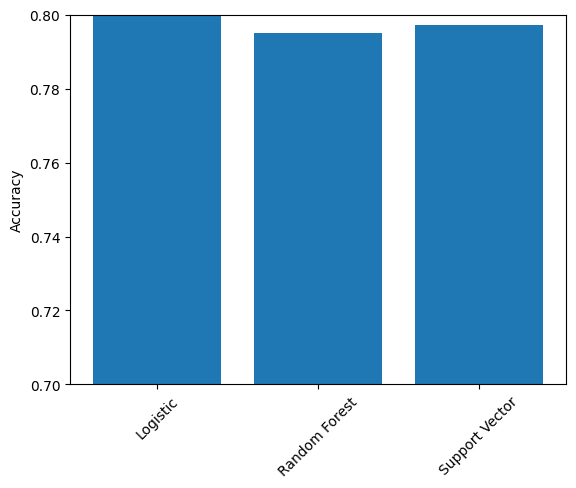


The accuracies for the models are as follows 
Logistic Regression 0.8051585621005923 
Random Forest Classifier 0.7952042628774423 
Support Vector Machine 0.7973341213504168 



In [71]:
# running all the models

log_reg = logistic_reg(x_train, x_test, y_train, y_test)  # logistic regression
r_for = random_forest(x_train, x_test, y_train, y_test)  # random forest classifier
svm = support_vec(x_train, x_test, y_train, y_test)  # support vector machine

# plotting the mean cv accuracies found for each model
plt.figure()
plt.bar(range(1,4),[log_reg, r_for, svm])
plt.xticks(range(1,4),['Logistic','Random Forest', 'Support Vector'], rotation=45)
plt.ylabel("Accuracy")
plt.ylim(0.7,0.8)
plt.show()

# printing the mean cv accuracies for each model
print('\nThe accuracies for the models are as follows',
      '\nLogistic Regression', log_reg,
      '\nRandom Forest Classifier', r_for,
      '\nSupport Vector Machine', svm, '\n')

# here, we can see that logistic regression is performing the best, so it is selected as the final model

### Performance Matrix

In [81]:
from sklearn.metrics import confusion_matrix

# Fit logistic regression model
model = LogisticRegression(max_iter=1000, random_state = 0)  # defining the model
model.fit(x_train, y_train)  # fitting the model to the training data
y_pred = model.predict(x_test)

# Predict probabilities
pred_prob = model.predict_proba(data_input)[:, 1]  # Predicted probabilities for positive class
# Thresholds for classification
thresholds = [0.9, 0.75, 0.25, 0.5]

for threshold in thresholds:
    # Classify based on the threshold
    pred_class = (pred_prob >= threshold).astype(int)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(data_output, pred_class).ravel()

    # Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    print(f"Threshold: {threshold}")
    print(f"TPR: {tpr:.4f}, FPR: {fpr:.4f}")

    # Calculate confusion matrix and expected profit using a cost-benefit matrix
    confusion_matrix_vals = [tp, fp * -0.3, fn * 0.1, tn]
    cost_benefit_matrix = [0, 0, -0.3, 0.1]
    expected_profit = sum([a * b for a, b in zip(confusion_matrix_vals, cost_benefit_matrix)])
    print(f"Expected Profit: {expected_profit}\n")

  # Baseline calculation (majority rule)
baseline_matrix = np.array([0, 0, np.sum(data_output), len(data)-np.sum(data_output)])
baseline_profit = np.dot(cost_benefit_matrix, baseline_matrix)
print(f"Baseline Expected Profit: {baseline_profit}")


Threshold: 0.9
TPR: 0.0000, FPR: 0.0000
Expected Profit: 460.2300000000001

Threshold: 0.75
TPR: 0.0867, FPR: 0.0056
Expected Profit: 462.19

Threshold: 0.25
TPR: 0.8218, FPR: 0.2882
Expected Profit: 357.51

Threshold: 0.5
TPR: 0.5543, FPR: 0.1044
Expected Profit: 437.41

Baseline Expected Profit: -44.399999999999864


In [82]:
data_output

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [83]:
np.sum(data_output)

1869

In [84]:
np.sum(~data_output)

-8901

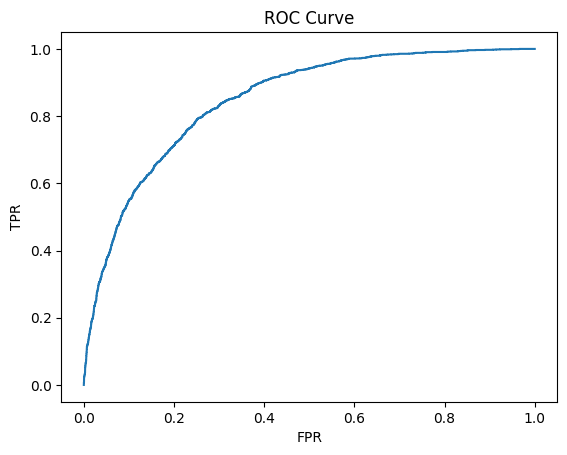

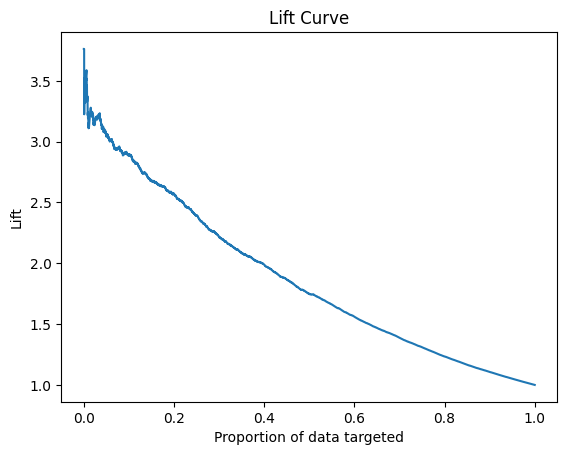

array([3.76243981, 3.76243981, 3.76243981, ..., 1.0002845 , 1.00014223,
       1.        ])

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix

# Define ROC Curve function
def roc(p, y):
    fpr, tpr, _ = roc_curve(y, p)
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.show()


# Define Lift Curve function
def lift_curve(p, y):
    n = len(p)
    sorted_indices = np.argsort(p)[::-1]
    sorted_predictions = p[sorted_indices]
    sorted_labels = y[sorted_indices]

    lift = np.zeros(n)
    for i in range(n):
        tp = np.sum(sorted_labels[:i+1])
        lift[i] = (tp / np.sum(sorted_labels)) / ((i+1) / n)

    proportion = np.arange(1, n+1) / n
    plt.plot(proportion, lift)
    plt.xlabel('Proportion of data targeted')
    plt.ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()
    return lift

data_output = data_output.reset_index(drop=True)
roc(pred_prob, data_output)
lift_curve(pred_prob, data_output)


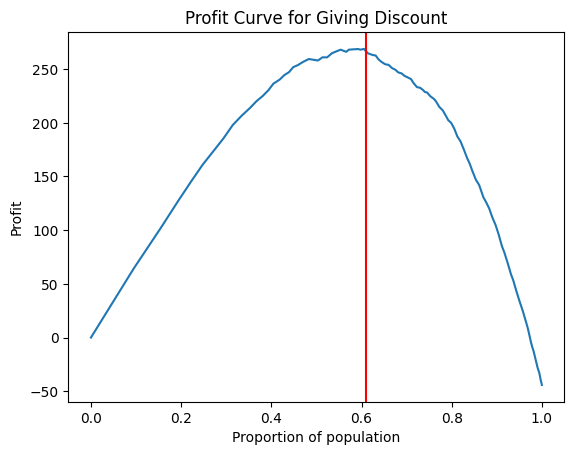

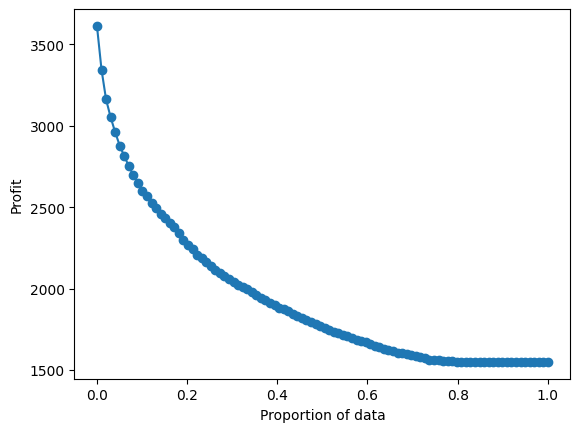

array([3614.1, 3346.1, 3162.5, 3053.3, 2960.9, 2878.5, 2812.9, 2752.9,
       2695.3, 2646.9, 2602.1, 2565.7, 2528.5, 2492.5, 2460.1, 2432.9,
       2404.9, 2377.7, 2339.7, 2296.1, 2266.9, 2240.1, 2207.7, 2186.1,
       2161.7, 2140.1, 2116.5, 2094.1, 2079.3, 2059.3, 2037.3, 2021.3,
       2009.3, 1994.1, 1976.1, 1961.7, 1944.5, 1931.3, 1914.1, 1901.3,
       1882.1, 1871.3, 1859.3, 1844.1, 1829.7, 1821.3, 1806.9, 1793.7,
       1781.7, 1771.7, 1756.1, 1748.1, 1734.9, 1724.5, 1716.1, 1705.7,
       1694.5, 1686.1, 1679.7, 1671.3, 1660.1, 1648.5, 1639.7, 1630.5,
       1622.1, 1613.3, 1606.5, 1602.1, 1595.3, 1590.5, 1583.3, 1578.9,
       1572.9, 1562.9, 1560.9, 1560.1, 1557.3, 1555.7, 1554.1, 1551.3,
       1550.1, 1549.7, 1549.3, 1549.3, 1549.3, 1548.9, 1548.9, 1548.9,
       1548.9, 1548.9, 1548.9, 1548.9, 1548.9, 1548.9, 1548.9, 1548.9,
       1548.9, 1548.9, 1548.9, 1548.9])

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def profictcurveOrder(score, y, cost_benefit_m, K=100):
    threshold = np.linspace(min(score), max(score), num=K)
    profit = np.zeros(len(threshold))
    prop = np.zeros(len(threshold))
    for i, thr in enumerate(threshold[::-1]):
        confusion_matrix = [
            np.sum((score >= thr) & y),
            np.sum((score >= thr) & ~y),
            np.sum((score < thr) & y),
            np.sum((score < thr) & ~y)
        ]
        profit[i] = np.dot(cost_benefit_m, confusion_matrix)
        prop[i] = np.sum(score < thr) / len(score)
    plt.plot(prop, profit)
    plt.xlabel('Proportion of population')
    plt.axvline(x = 0.61, color = 'r')
    plt.ylabel('Profit')
    plt.title('Profit Curve for Giving Discount')
    plt.show()

def profitcurveAll(p, y, cost_benefit_m):
    y = np.array(y)
    p = np.array(p)
    n = len(p)
    pp = p[np.argsort(p)[::-1]]
    yy = y[np.argsort(p)[::-1]]
    thresholds = np.linspace(0, 1, num=100)
    TP = []
    FP = []
    TN = []
    FN = []
    for thr in thresholds:
        Q = (pp > thr).astype(int)
        tn = np.sum(Q[yy == np.min(yy)])
        fn = np.sum(~Q[yy == np.min(yy)])
        tp = np.sum(Q[yy == np.max(yy)])
        fp = np.sum(~Q[yy == np.max(yy)])
        TN.append(tn)
        FN.append(fn)
        TP.append(tp)
        FP.append(fp)
    profit = np.dot(cost_benefit_m, np.array([TP, FP, FN, TN]))
    plt.plot(np.linspace(0, 1, num=100), profit, '-o')
    plt.xlabel('Proportion of data')
    plt.ylabel('Profit')
    plt.show()
    return profit

# Example usage:
# Assuming 'pred_lr_pl', 'My', and 'cost_benefit_matrix' are your data variables
profictcurveOrder(pred_prob, data_output, cost_benefit_matrix)
profitcurveAll(pred_prob, data_output, cost_benefit_matrix)
